---
# 1. IMPORT LIBARIES

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

--- 
# 2. LOAD IRIS-DATASET 
SKLEARN can use even multiclass regression (parameter multi_class=`multinominal` or `ovr` as oneVersusRest) for more than one (1) class separation

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Shape von X: ", X.shape)
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Shape von y: ", y.shape)
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))
print("Shape von X/y: ", X.shape, " / ", y.shape)

Shape von X:  (150, 2)
Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape von y:  (150,)
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']
Klassenbezeichnungen als Zahlen:  [0 1 2]
Shape von X/y:  (150, 2)  /  (150,)


---
# PREPARE DATA

## 1. TRAIN_TEST_SPLIT

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3, stratify=y)
print("Bezeichner in y: ",     np.bincount(y))
print("Bezeichner in train: ", np.bincount(y_train))
print("Bezeichner in test: ",  np.bincount(y_test))

Bezeichner in y:  [50 50 50]
Bezeichner in train:  [35 35 35]
Bezeichner in test:  [15 15 15]


## 2. STANDARDIZE VALUES

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

---
# MODEL: LOGISTIC REGRESSION

## 1. FIT MODEL ON DATA

In [5]:
logReg = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="ovr")
logReg.fit(X=X_train_std, y=y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

---
# PLOT DATA AND VISUALIZE RESULTS

In [6]:
def plot_decision_regions(X :np.array, y :np.array, classifier: LogisticRegression, test_idx=None, resolution=.005):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=iris.target_names[cl],
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')


In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

Index:  0
Index:  1
Index:  2


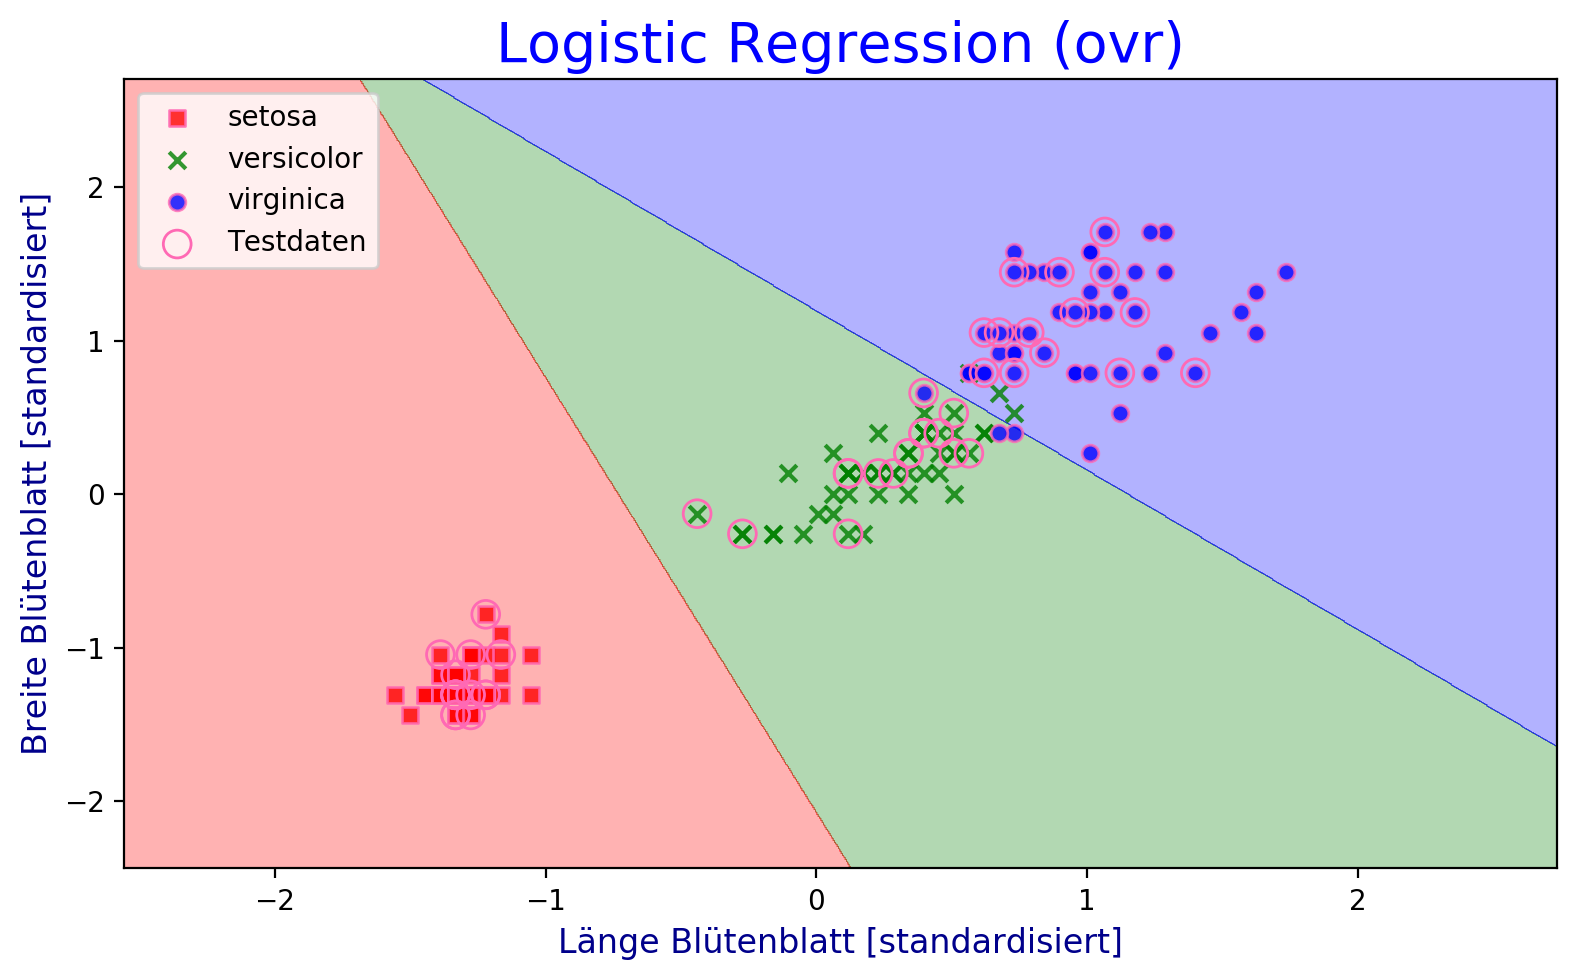

In [8]:
figure(figsize=(8,5), dpi=200)
plot_decision_regions(X_combined_std, y_combined, classifier=logReg, test_idx=range(105,150))
plt.xlabel("Länge Blütenblatt [standardisiert]", fontdict={"color":"darkblue", "size":12})
plt.ylabel("Breite Blütenblatt [standardisiert]", fontdict={"color":"darkblue", "size":12})
plt.title("Logistic Regression (ovr)", fontdict={"color":"blue", "size":20})
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

---
# WEITERE ERLÄUTERUNGEN ZU DEN DATEN

## 1. Wahrscheinlichkeit, dass eine Blume zu einer Kategorie gehört --> für die ersten 5 Blumen

In [9]:
logReg.predict_proba(X_test_std[:5]) 

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14],
       [1.22837128e-05, 6.94113176e-01, 3.05874540e-01],
       [1.06487405e-04, 9.82979706e-01, 1.69138067e-02]])

`Zeile [1]` - Der höchste Wert ist 8.55 --> sprich die Wahrscheinlichkeit, dass die Blume in zur Kategorie 3 gehört = 85%<br>
`Zeile [2]` - Der höchste Wert ist 8.34 --> sprich die Wahrscheinlichkeit, dass die Blume in zur Kategorie 1 gehört = 83%<br>
...<br>
`Zeile [4]` - Der höchste Wert ist 6.94 --> sprich die Wahrscheinlichkeit, dass die Blume in zur Kategorie 2 gehört = 69%
<br><br><br>
Unterhalb sehen wir, dass die je Zeile die Summe (wie zu erwarten) 1 - also 100% ergibt

In [10]:
logReg.predict_proba(X_test_std[:5, :]).sum(axis=1)

array([1., 1., 1., 1., 1.])

Wir können die vorhergesagt Klasse (die mit dem höchsten Wahrscheinlichkeitswert bzw. %-Satz) mittels der argmax-Funktion ermitteln:<br>
Sprich die Spalten mit dem höchsten Wert sind Spalte 2, 0, 0, 1 und 1

In [11]:
logReg.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 1, 1], dtype=int64)

Analog geht das aber in der praxis einfacher, wenn man direkt die `predict`-Methode aufruft

In [12]:
logReg.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1])

### REGULARISIERUNG DER GEWICHTE
Dafür müssen die Merkale standardisiert sein, damit es zu keinen Verzerrungen kommt.<br>
Wie man sehen kann, schrumpfen die Gewichtskoeffizienten, wenn man die Regularisierungsstärke erhöht. (c verkleinert)

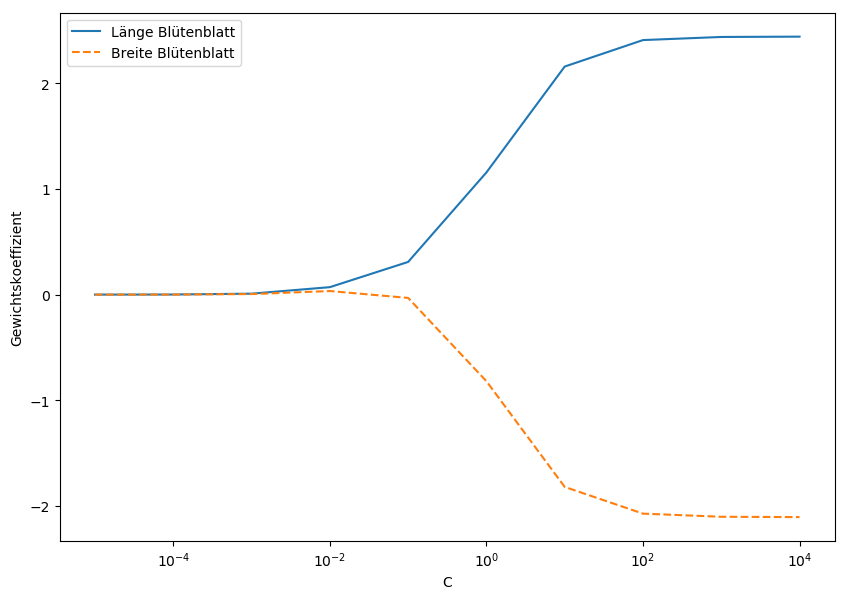

In [16]:
weights, params = [], []
for c in np.arange(-5, 5):
    logReg = LogisticRegression(C=10.**c, random_state=1, solver="lbfgs", multi_class="ovr")
    logReg.fit(X_train_std, y_train)
    weights.append(logReg.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)

figure(figsize=(10,7), dpi=100)
plt.plot(params, weights[:,0], label="Länge Blütenblatt")
plt.plot(params, weights[:,1], label="Breite Blütenblatt", linestyle="--")
plt.xlabel("C")
plt.ylabel("Gewichtskoeffizient")
plt.legend(loc="upper left")
plt.xscale('log')
plt.show()